In [36]:
# Declarando as bibliotecas necessárias.
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import six
from io import StringIO
from sklearn.datasets import make_blobs

In [37]:
# Carregando a imagem.
imagem = np.array(Image.open('img2.jpg'),dtype = np.float64)/255

In [38]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])

In [39]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(imagem.shape)
assert d == 3
image_array = np.reshape(imagem, (w * h, d))

print("Fitting model on a small sub-sample of the data")

# Criando os dados a serem manipulados.
N = 1000
X, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1,
center_box=(-10.0, 10.0), shuffle=True, random_state=1)

Fitting model on a small sub-sample of the data


In [40]:
# considerando 2 clusters.

n_colors = 2

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.097s.
Predicting color indices on the full image (k-means)
done in 0.039s.


Predicting color indices on the full image (random)
done in 0.025s.


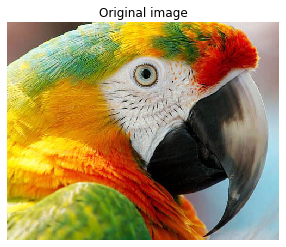

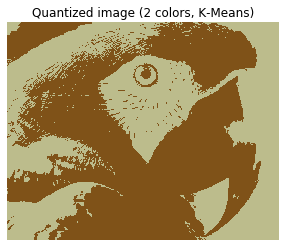

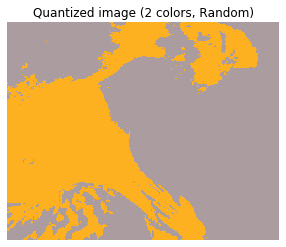

In [41]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

# Remontado a imagem
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(imagem)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (2 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (2 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [42]:
# considerando 4 clusters.

n_colors = 4

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.088s.
Predicting color indices on the full image (k-means)
done in 0.044s.


Predicting color indices on the full image (random)
done in 0.039s.


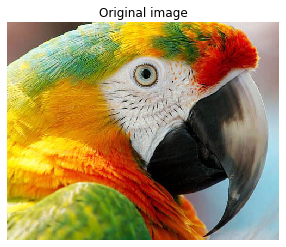

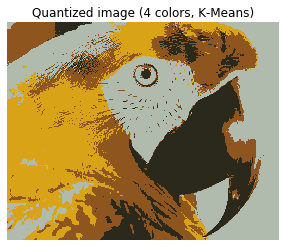

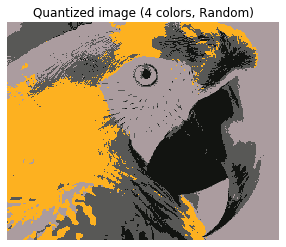

In [43]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

# Remontado a imagem
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(imagem)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (4 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (4 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [44]:
# considerando 8 clusters.

n_colors = 8

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.123s.
Predicting color indices on the full image (k-means)
done in 0.062s.


Predicting color indices on the full image (random)
done in 0.064s.


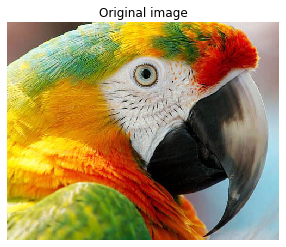

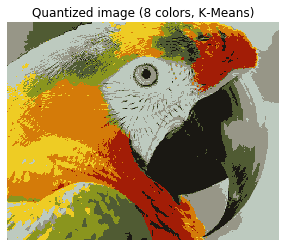

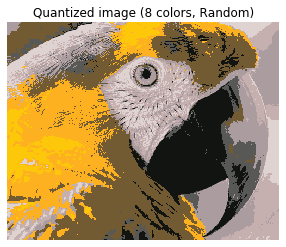

In [45]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

# Remontado a imagem
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(imagem)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (8 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (8 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [46]:
# considerando 16 clusters.

n_colors = 16

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.175s.
Predicting color indices on the full image (k-means)
done in 0.094s.


Predicting color indices on the full image (random)
done in 0.097s.


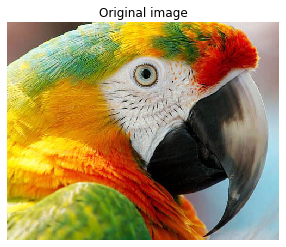

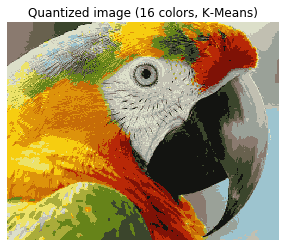

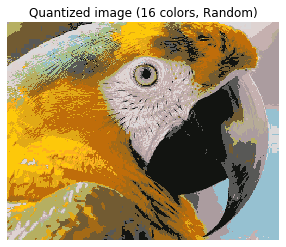

In [47]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

# Remontado a imagem
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(imagem)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()